In [1]:
# Drop variables that don't seem to be contributing *or* much of them have problems
# (Wave 9 variables, high (anti-/)correlation variables, mostly not filled out, very low variance, too many categories)
# Transform variables (making some more easily readable
# and dummying non-ordinal categorical variables to create lots of new variables)
# rechecking if those new variables suffer from excessive levels of correlation

# Output: 
# BES_reduced - imputed dataset post-transformation
# BES_reduced_with_na - non-imputed dataset post-transformation


In [2]:
# import numpy as np
# import pandas as pd
# %matplotlib inline
# import matplotlib.pyplot as plt
# import gc
# import re

# from itertools import cycle
# from IPython.display import display
# import pickle, os

# import seaborn as sns

# encoding = "ISO-8859-1"

# import Jupyter_module_loader

# from utility import *

In [3]:
# # you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

# if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
#     raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

# BES_code_folder   = "../BES_analysis_code/" # we should be here!
# BES_small_data_files = BES_code_folder + "small data files" + os.sep
# if not os.path.exists( BES_small_data_files ):
#     os.makedirs( BES_small_data_files )

# # we should create these if they don't already exist
# BES_data_folder   = "../BES_analysis_data/"
# if not os.path.exists( BES_data_folder ):
#     os.makedirs( BES_data_folder )

# BES_output_folder = "../BES_analysis_output/"
# if not os.path.exists( BES_output_folder ):
#     os.makedirs( BES_output_folder )
    
# BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

In [4]:
# dataset_name = "W19_comb"

In [5]:
# # %%time

# manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

# data_subfolder = BES_data_folder + dataset_name + os.sep

# filename = manifest["Stata_Filename"].values[0]

# BES_Panel  = pd.read_pickle(data_subfolder + filename.replace('.dta','.zip'),compression='zip')
# print("BES_Panel", BES_Panel.shape )


# # BES_numeric = pd.read_msgpack( data_subfolder + "BESnumeric.msgpack" )
# BES_numeric = pd.read_pickle( data_subfolder + "BESnumeric.zip", compression='zip' )
# print("BES_numeric",  BES_numeric.shape )

# try:
#     var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
#     var_type.set_index("Unnamed: 0", inplace=True)
# except:
#     var_type    = pd.read_hdf( data_subfolder + "var_type.hdf", encoding=encoding)
# print("var_type",  var_type.shape )

# fname = data_subfolder + "cat_dictionary.pkl"
# with open(fname, "rb") as f:
#     cat_dictionary = pickle.load( f )

In [12]:
# BES_Panel = pd.read_stata('..\\BES_analysis_data\\W25_only\\BES2019_W25_v25.0.dta')
# BES_Panel.to_pickle('..\\BES_analysis_data\\W25_only\\BES2019_W25_v25.0.zip',compression='zip')

In [155]:
%%time
dataset_name = "W25_comb"
df_list = 'BES_Panel|BESnumeric'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)  
try:
    var_type    = pd.read_msgpack( data_subfolder + "var_type.msgpack")
except:
    var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
    var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )

Toggle code

var_type (10365, 13)
old_new_col_names not loaded
var_type (10365, 13)
Wall time: 2min 20s


In [156]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [157]:
# ## somewhere better for this

###################################################


# reader = pd.io.stata.StataReader(BES_data_folder+"W19_comb//"+"BES2019_W19_Panel_v0.2.dta")

# header = reader.variable_labels()
# labels = reader.value_labels()

# pd.Series(header).to_pickle(BES_data_folder+"W19_comb//"+"column_description.zip",compression='zip')
# import pickle
# with open(BES_data_folder+"W19_comb//"+"variable_labels.zip", 'wb') as handle:
#     pickle.dump(labels, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [158]:
BES_numeric=BESnumeric
del BESnumeric

# BES_Panel = BES_Panel_clean
# del BES_Panel_clean


In [159]:
# BES_numeric.dtypes.value_counts()

In [160]:
# BES_numeric.shape

In [161]:
%%time
medians = BES_numeric.astype('float32').median()

Wall time: 9.05 s


In [162]:
# BES_numeric.dtypes.apply(lambda x: str(x.name)).to_dict()

In [163]:
%%time
BES_imputed = BES_numeric.astype( 'float32' ).fillna(medians)
gc.collect()

Wall time: 6.86 s


0

In [164]:
BES_imputed = BES_imputed.apply(lambda x: pd.to_numeric( x , downcast='unsigned' ) )

In [165]:
BES_imputed.dtypes.value_counts()

uint8      9881
uint16       59
float32      16
uint32        8
dtype: int64

In [166]:
# BES_imputed = BES_numeric.fillna(medians)
# print("BES_imputed",  BES_imputed.shape )

In [167]:
# %%time
# imputation_method = "mice" # "mice", "softimpute", "median", ???
# imputed_file_name = "BES" + imputation_method + wave

# imputation_method = "median" # "mice", "softimpute", "median", ???
# imputed_file_name = "BES" + imputation_method + wave


# BES_imputed = pd.read_hdf( BES_data_folder + imputed_file_name  + ".hdf", imputed_file_name )
# BES_numeric.replace(-1,np.nan,inplace=True)
# BES_imputed = BES_numeric.fillna(BES_numeric.median())


In [168]:
# bool_vars = BES_numeric.columns[BES_numeric.dtypes=="boolean"]
# BES_numeric[bool_vars] = BES_numeric[bool_vars].astype('Int8')

In [169]:
# England_inds = BES_Panel[BES_Panel["country"]=="England"].index
# print ( "respondents not from England: ", len(BES_Panel) - len(England_inds) )
# Remain_inds  = BES_Panel[ BES_Panel["euRefVote"].cat.codes==0 ].index
# Leave_inds   = BES_Panel[ BES_Panel["euRefVote"].cat.codes==1 ].index
# Notvoters_inds  = BES_Panel[ BES_Panel["euRefVote"].cat.codes==2 ].index
# Dontknow_inds   = BES_Panel[ BES_Panel["euRefVote"].cat.codes==3 ].index
# print ( "respondents not Remain/Leave: ", len(BES_Panel) - len(Remain_inds) - len(Leave_inds) )
# Leave_Remain_inds = pd.Index( np.concatenate( (Leave_inds, Remain_inds), axis=0 ) )
# EngRemLea_inds = pd.Index( np.intersect1d( England_inds, Leave_Remain_inds ) )

In [170]:
# W9_vars = pd.Index([x for x in BES_numeric.columns if "W9" in x])
# print ( "W9 columns: ", W9_vars )

In [171]:
# W9_vars = []

In [172]:
opts_per_cat = BES_numeric.apply(lambda x: len(pd.unique(x.dropna()))).sort_values()
many_cat_drop_list = opts_per_cat[opts_per_cat>60].index
# added to make sure we're only dropping *categorical* variables with lots of categories!
many_cat_drop_list = [x for x in var_type.loc[many_cat_drop_list].index
                      if var_type.loc[many_cat_drop_list].loc[x]["type"] in [3,7]]
print("many_cat_drop_list", many_cat_drop_list )

many_cat_drop_list ['oslauaW20', 'oslauaW22', 'oslauaW24', 'oslauaW25', 'oslauaW5', 'oslauaW17', 'oslauaW15', 'oslauaW14', 'oslauaW13', 'oslauaW1', 'oslauaW11', 'oslauaW10', 'oslauaW3', 'oslauaW9', 'oslauaW4', 'oslauaW6', 'oslauaW18', 'oslauaW23', 'oslauaW21', 'oslauaW19', 'oslauaW8', 'oslauaW12', 'oslauaW16', 'oslauaW7', 'oslauaW2', 'pconW11', 'pconW2', 'pconW3', 'pconW4', 'pconW5', 'pconW6', 'pconW7', 'pconW8', 'pconW9', 'pconW10', 'pconW12', 'pconW21', 'pconW14', 'pconW15', 'pconW16', 'pconW17', 'pconW18', 'pconW19', 'pconW20', 'pconW22', 'pconW23', 'pconW24', 'pconW25', 'pconW13', 'mpNameW1', 'pconW1']


In [173]:
many_cat_drop_list

['oslauaW20',
 'oslauaW22',
 'oslauaW24',
 'oslauaW25',
 'oslauaW5',
 'oslauaW17',
 'oslauaW15',
 'oslauaW14',
 'oslauaW13',
 'oslauaW1',
 'oslauaW11',
 'oslauaW10',
 'oslauaW3',
 'oslauaW9',
 'oslauaW4',
 'oslauaW6',
 'oslauaW18',
 'oslauaW23',
 'oslauaW21',
 'oslauaW19',
 'oslauaW8',
 'oslauaW12',
 'oslauaW16',
 'oslauaW7',
 'oslauaW2',
 'pconW11',
 'pconW2',
 'pconW3',
 'pconW4',
 'pconW5',
 'pconW6',
 'pconW7',
 'pconW8',
 'pconW9',
 'pconW10',
 'pconW12',
 'pconW21',
 'pconW14',
 'pconW15',
 'pconW16',
 'pconW17',
 'pconW18',
 'pconW19',
 'pconW20',
 'pconW22',
 'pconW23',
 'pconW24',
 'pconW25',
 'pconW13',
 'mpNameW1',
 'pconW1']

In [174]:
# %%time
# counts = BES_numerics_only[BES_num_and_cat["wave9"]==1 ].count()
# counts_by_individuals = BES_numerics_only[BES_num_and_cat["wave9"]==1 ].count(axis=1) # lets see
# f, axarr = plt.subplots( 2 ,figsize=(5, 5) )
# axarr[0].hist(counts,bins=50)
# axarr[1].hist(counts_by_individuals,bins=50)

In [175]:
# drop people who are coverage outliers
# say top and bottom 5%
# BES_red = BES_numerics_only.loc[BES_reduced["wave9"]==1 ].copy()

In [176]:
# thresh = .00
# BES_red = BES_numeric.copy()
# BES_red["coverage"] = BES_numeric.count(axis=1)/BES_numeric.shape[1]

# outlier_people = BES_red[( BES_red["coverage"]>BES_red["coverage"].quantile(1-thresh) ) | 
#                          ( BES_red["coverage"]<BES_red["coverage"].quantile(  thresh) ) ].index
# inlier_people  = BES_red[( BES_red["coverage"]<BES_red["coverage"].quantile(1-thresh) ) & 
#                          ( BES_red["coverage"]>BES_red["coverage"].quantile(  thresh) ) ].index

Wall time: 3.16 s


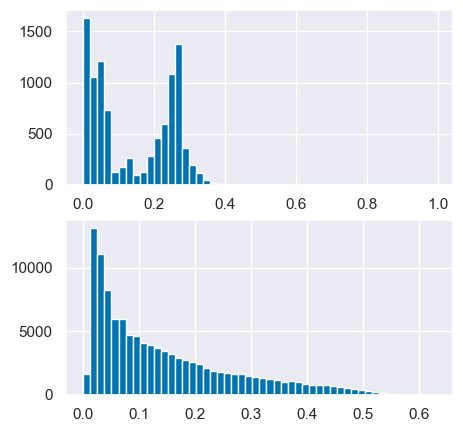

In [177]:
%%time
# columns histogrammed by %non-missing values
# rows histogrammed by %non-missing values

counts = BES_numeric.count()/BES_numeric.shape[0]
counts_by_individuals = BES_numeric.count(axis=1)/BES_numeric.shape[1] # lets see
f, axarr = plt.subplots( 2 ,figsize=(5, 5) )
ax = axarr[0].hist(counts,bins=50)
ax = axarr[1].hist(counts_by_individuals,bins=50)

In [178]:
# In theory, this is picked on the basis of looking at the above two diagrams (really, the top one!)
# thresh = 0.33
# missing_value_thresh = 0.33
missing_value_thresh = 0.05

mostly_not_filled_out = counts[counts<= (counts.max()*missing_value_thresh)].index
mostly_filled_out     = counts[counts>  (counts.max()*missing_value_thresh)].index

In [179]:
# missing_value_thresh = 0.8

# mostly_not_filled_out = counts[counts<= (counts.max()*missing_value_thresh)].index
# mostly_filled_out     = counts[counts>  (counts.max()*missing_value_thresh)].index

In [180]:
print(BES_numeric[mostly_filled_out].shape)
missing_fraction = BES_numeric[mostly_filled_out].isnull().sum().sum() / \
    (BES_numeric[mostly_filled_out].shape[0]*BES_numeric[mostly_filled_out].shape[1])
print(missing_fraction)

(111621, 6748)
0.7991490272833285


In [181]:
# %%time
# frac=.2
# BES_numeric.sample(frac=frac).sample(frac=frac, axis=1).shape
# np.corrcoef( BES_numeric.sample(frac=frac).sample(frac=frac, axis=1) )
# BES_numeric.sample(frac=frac).sample(frac=frac, axis=1).corr(min_periods=100, method='pearson')



In [182]:
def memory_cheap_corrcoef(x):
    rowvar=True
    m = np.asarray(x)
    dtype = np.result_type(m, np.float32)
    X = np.array(m, ndmin=2, dtype=dtype).T
    fact = X.shape[1]
    avg = np.average(X, axis=1, returned=True)
    X-= avg[0][:,None]
    c = np.dot(X, X.T.conj())/fact
    # c *= np.true_divide(1, fact)
    c= c.squeeze()    
    
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
    c /= stddev[:, None]
    c /= stddev[None, :]

    # Clip real and imaginary parts to [-1, 1].  This does not guarantee
    # abs(a[i,j]) <= 1 for complex arrays, but is the best we can do without
    # excessive work.
    np.clip(c.real, -1, 1, out=c.real)
    if np.iscomplexobj(c):
        np.clip(c.imag, -1, 1, out=c.imag)

    return c



In [183]:
# np.array(m, ndmin=2, dtype=dtype)

In [184]:
memory_use(locs = locals().items())

                   BES_numeric:   8.3GiB
                     BES_Panel:   1.5GiB
                   BES_imputed:   1.1GiB
           BES_reduced_with_na: 111.4MiB
                   BES_reduced:  28.0MiB
                      var_type:   8.8MiB
                         corrs:   3.5MiB
         counts_by_individuals:   1.7MiB
                        counts:   1.0MiB
                          mask: 900.1KiB


In [185]:
# BES_imputed.loc[BES_imputed.index[::2]]

In [186]:
%%time
corrs = memory_cheap_corrcoef(BES_imputed.astype('float32'))
corr_mat = pd.DataFrame(corrs,index=BES_imputed.columns, columns=BES_imputed.columns)
corr_mat.to_pickle(BES_data_folder+dataset_name+os.sep+"corr_df.zip",compression='zip')
# .loc[BES_imputed.index[::4]]

Wall time: 52.3 s


In [187]:
# corrs.shape
# corr_mat = pd.DataFrame(corrs,index=BES_imputed.columns, columns=BES_imputed.columns)
# corr_mat.to_pickle(BES_data_folder+dataset_name+os.sep+"corr_df.zip",compression='zip')

In [188]:
# pd.DataFrame(corrs,

In [189]:
# %%time
# # 0.05, 0.0025: 2.34
# # 0.10, 0.01: 10.7s
# # 0.10, spearman: 27s
# # 0.10, kendall: 56s
# # 0.15, 0.0225, pearson: 29s
# # 0.20, 0.04, pearson: 65s
# # 30 mins?
# # W14_only: 55s
# try:
#     corr_mat = pd.read_pickle(BES_data_folder+dataset_name+os.sep+"corr_df.zip",compression='zip')
# except:
#     corr_mat = BES_numeric.corr()
#     corr_mat.to_pickle(BES_data_folder+dataset_name+os.sep+"corr_df.zip",compression='zip')

Wall time: 2.81 s


<AxesSubplot:>

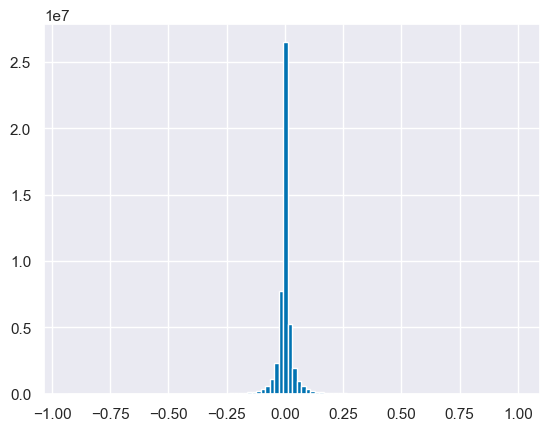

In [190]:
%%time
## 5 minutes!
## 8h 41min 19s on W10_comb panel!

# data = BES_numeric
# corr_mat = BES_numeric.corr()

# create lower triangle - diag mask
col_vars = len( corr_mat )
df = pd.DataFrame( np.arange(col_vars*col_vars).reshape(col_vars,col_vars) )
mask = np.ones(df.shape,dtype='bool')
mask[np.triu_indices(len(df))] = False
corr_mat.mask(~mask).stack().hist(bins=100)

In [191]:
# build a data frame of pairs of highly corr/anti-corr variables
# score on correlation, %non-missing values for each
# Building the high_corr_list is still **manual** (not much reason to automate)


corr_df = pd.DataFrame(columns = ["var1","var2","corr","var1%","var2%","min var%"])

id_num = 0

# min_filled_out = 0.02
min_filled_out = 0.02

thresh = .05
x = ( ( corr_mat>(1-thresh) ) &mask ).values.nonzero()

for i in range( 0,len(x[0]) ):
    a = corr_mat.columns[ x[0][i] ]
    b = corr_mat.columns[ x[1][i] ]
    c = BES_numeric[a].notnull().mean()
    d = BES_numeric[b].notnull().mean()
    mincd = min(c,d)
    if mincd > min_filled_out:
        corr_df.loc[id_num] = [ a,b,corr_mat[a][b], c, d, mincd ]
        id_num = id_num + 1


x = ( ( corr_mat<(thresh-1) ) &mask ).values.nonzero()

for i in range( 0,len(x[0]) ):
    a = corr_mat.columns[ x[0][i] ]
    b = corr_mat.columns[ x[1][i] ]
    c = BES_numeric[a].notnull().mean()
    d = BES_numeric[b].notnull().mean()
    mincd = min(c,d)
    if (mincd > min_filled_out):
        corr_df.loc[id_num] = [ a,b,corr_mat[a][b], c, d, mincd ]
        id_num = id_num + 1

corr_df

var1                  var2      corr     var1%  \
0            euRefVoteUnsqueezeW7           euRefVoteW7  0.963394  0.234526   
1                    euRefVote2W8  euRefVoteUnsqueezeW8  0.969066  0.240107   
2        ns_sec_analyticW16W17W18       ns_secW16W17W18  0.980656  0.345688   
3              ns_sec_analyticW19             ns_secW19  0.980547  0.233890   
4              ns_sec_analyticW20             ns_secW20  0.980765  0.229840   
5              ns_sec_analyticW21             ns_secW21  0.980856  0.214323   
6              ns_sec_analyticW22             ns_secW22  0.980930  0.201020   
7              ns_sec_analyticW23             ns_secW23  0.980907  0.218445   
8              ns_sec_analyticW25             ns_secW25  0.980993  0.210838   
9          ns_sec_analytic_parent         ns_sec_parent  0.982904  0.202059   
10  ns_sec_analytic_partnerW20W25  ns_sec_partnerW20W25  0.985238  0.165354   
11        ns_sec_analyticW6W7W8W9        ns_secW6W7W8W9  0.978553  0.359242   
12                     ageGroupW1                 ageW1  0.966049  0.273864   
13                     ageGroupW2                 ageW2  0.953773  0.271078   
14                     ageGroupW3                 ageW3  0.968338  0.249281   
15                     ageGroupW4                 ageW4  0.975377  0.282617   
16                     ageGroupW5                 ageW5  0.967304  0.275118   
17                     ageGroupW6                 ageW6  0.967141  0.270110   
18                     ageGroupW7                 ageW7  0.974750  0.276785   
19                     ageGroupW8                 ageW8  0.956168  0.300141   
20                    ageGroupW10                ageW10  0.973633  0.270881   
21                    ageGroupW11                ageW11  0.965680  0.277331   
22                    ageGroupW12                ageW12  0.956617  0.308132   
23                    ageGroupW13                ageW13  0.954428  0.278935   
24                    ageGroupW14                ageW14  0.965594  0.278290   
25                    ageGroupW15                ageW15  0.965141  0.276211   
26                    ageGroupW16                ageW16  0.974700  0.340070   
27                    ageGroupW17                ageW17  0.972546  0.307881   
28                    ageGroupW18                ageW18  0.954135  0.338870   
29                    ageGroupW19                ageW19  0.961649  0.288270   
30                    ageGroupW20                ageW20  0.977686  0.281918   
31                    ageGroupW21                ageW21  0.967612  0.271284   
32                    ageGroupW23                ageW23  0.952706  0.277269   
33                    ageGroupW24                ageW24  0.971059  0.138316   
34                         pconW1              mpNameW1  0.973987  0.274043   
35                  p_socgradeW11          socgrade4W11  0.954815  0.275584   
36                 p_edlevelUniW7           p_edlevelW7  0.981014  0.256941   
37                 p_edlevelUniW9           p_edlevelW9  0.979602  0.250482   
38                p_edlevelUniW10          p_edlevelW10  0.981329  0.252202   
39                p_edlevelUniW11          p_edlevelW11  0.980434  0.258321   
40                p_edlevelUniW12          p_edlevelW12  0.979739  0.287061   
41                p_edlevelUniW13          p_edlevelW13  0.980993  0.260560   
42                p_edlevelUniW14          p_edlevelW14  0.979826  0.258688   
43                p_edlevelUniW15          p_edlevelW15  0.980896  0.255507   
44                p_edlevelUniW16          p_edlevelW16  0.979311  0.313642   
45                p_edlevelUniW19          p_edlevelW19  0.980995  0.267441   
46                p_edlevelUniW20          p_edlevelW20  0.980189  0.260775   
47                p_edlevelUniW21          p_edlevelW21  0.981505  0.253035   
48                p_edlevelUniW22          p_edlevelW22  0.999913  0.216680   
49                p_edlevelUniW23          p_edlevelW23  0.999449  0.239014   


In [192]:
# corr_df.to_hdf(BES_data_folder+"corr_dfW10Panel.hdf","corr_dfW10Panel")


In [193]:
corr_df

var1                  var2      corr     var1%  \
0            euRefVoteUnsqueezeW7           euRefVoteW7  0.963394  0.234526   
1                    euRefVote2W8  euRefVoteUnsqueezeW8  0.969066  0.240107   
2        ns_sec_analyticW16W17W18       ns_secW16W17W18  0.980656  0.345688   
3              ns_sec_analyticW19             ns_secW19  0.980547  0.233890   
4              ns_sec_analyticW20             ns_secW20  0.980765  0.229840   
5              ns_sec_analyticW21             ns_secW21  0.980856  0.214323   
6              ns_sec_analyticW22             ns_secW22  0.980930  0.201020   
7              ns_sec_analyticW23             ns_secW23  0.980907  0.218445   
8              ns_sec_analyticW25             ns_secW25  0.980993  0.210838   
9          ns_sec_analytic_parent         ns_sec_parent  0.982904  0.202059   
10  ns_sec_analytic_partnerW20W25  ns_sec_partnerW20W25  0.985238  0.165354   
11        ns_sec_analyticW6W7W8W9        ns_secW6W7W8W9  0.978553  0.359242   
12                     ageGroupW1                 ageW1  0.966049  0.273864   
13                     ageGroupW2                 ageW2  0.953773  0.271078   
14                     ageGroupW3                 ageW3  0.968338  0.249281   
15                     ageGroupW4                 ageW4  0.975377  0.282617   
16                     ageGroupW5                 ageW5  0.967304  0.275118   
17                     ageGroupW6                 ageW6  0.967141  0.270110   
18                     ageGroupW7                 ageW7  0.974750  0.276785   
19                     ageGroupW8                 ageW8  0.956168  0.300141   
20                    ageGroupW10                ageW10  0.973633  0.270881   
21                    ageGroupW11                ageW11  0.965680  0.277331   
22                    ageGroupW12                ageW12  0.956617  0.308132   
23                    ageGroupW13                ageW13  0.954428  0.278935   
24                    ageGroupW14                ageW14  0.965594  0.278290   
25                    ageGroupW15                ageW15  0.965141  0.276211   
26                    ageGroupW16                ageW16  0.974700  0.340070   
27                    ageGroupW17                ageW17  0.972546  0.307881   
28                    ageGroupW18                ageW18  0.954135  0.338870   
29                    ageGroupW19                ageW19  0.961649  0.288270   
30                    ageGroupW20                ageW20  0.977686  0.281918   
31                    ageGroupW21                ageW21  0.967612  0.271284   
32                    ageGroupW23                ageW23  0.952706  0.277269   
33                    ageGroupW24                ageW24  0.971059  0.138316   
34                         pconW1              mpNameW1  0.973987  0.274043   
35                  p_socgradeW11          socgrade4W11  0.954815  0.275584   
36                 p_edlevelUniW7           p_edlevelW7  0.981014  0.256941   
37                 p_edlevelUniW9           p_edlevelW9  0.979602  0.250482   
38                p_edlevelUniW10          p_edlevelW10  0.981329  0.252202   
39                p_edlevelUniW11          p_edlevelW11  0.980434  0.258321   
40                p_edlevelUniW12          p_edlevelW12  0.979739  0.287061   
41                p_edlevelUniW13          p_edlevelW13  0.980993  0.260560   
42                p_edlevelUniW14          p_edlevelW14  0.979826  0.258688   
43                p_edlevelUniW15          p_edlevelW15  0.980896  0.255507   
44                p_edlevelUniW16          p_edlevelW16  0.979311  0.313642   
45                p_edlevelUniW19          p_edlevelW19  0.980995  0.267441   
46                p_edlevelUniW20          p_edlevelW20  0.980189  0.260775   
47                p_edlevelUniW21          p_edlevelW21  0.981505  0.253035   
48                p_edlevelUniW22          p_edlevelW22  0.999913  0.216680   
49                p_edlevelUniW23          p_edlevelW23  0.999449  0.239014   


In [194]:
# corr_df = pd.read_hdf(BES_data_folder+"corr_dfW10Panel.hdf","corr_dfW10Panel")

In [195]:
corr_df.sort_values(by="min var%",ascending=False).head(70)

var1                  var2      corr     var1%  \
11        ns_sec_analyticW6W7W8W9        ns_secW6W7W8W9  0.978553  0.359242   
2        ns_sec_analyticW16W17W18       ns_secW16W17W18  0.980656  0.345688   
26                    ageGroupW16                ageW16  0.974700  0.340070   
28                    ageGroupW18                ageW18  0.954135  0.338870   
22                    ageGroupW12                ageW12  0.956617  0.308132   
27                    ageGroupW17                ageW17  0.972546  0.307881   
19                     ageGroupW8                 ageW8  0.956168  0.300141   
29                    ageGroupW19                ageW19  0.961649  0.288270   
44                p_edlevelUniW16          p_edlevelW16  0.979311  0.313642   
15                     ageGroupW4                 ageW4  0.975377  0.282617   
30                    ageGroupW20                ageW20  0.977686  0.281918   
23                    ageGroupW13                ageW13  0.954428  0.278935   
24                    ageGroupW14                ageW14  0.965594  0.278290   
21                    ageGroupW11                ageW11  0.965680  0.277331   
32                    ageGroupW23                ageW23  0.952706  0.277269   
18                     ageGroupW7                 ageW7  0.974750  0.276785   
25                    ageGroupW15                ageW15  0.965141  0.276211   
35                  p_socgradeW11          socgrade4W11  0.954815  0.275584   
16                     ageGroupW5                 ageW5  0.967304  0.275118   
34                         pconW1              mpNameW1  0.973987  0.274043   
12                     ageGroupW1                 ageW1  0.966049  0.273864   
31                    ageGroupW21                ageW21  0.967612  0.271284   
13                     ageGroupW2                 ageW2  0.953773  0.271078   
20                    ageGroupW10                ageW10  0.973633  0.270881   
17                     ageGroupW6                 ageW6  0.967141  0.270110   
40                p_edlevelUniW12          p_edlevelW12  0.979739  0.287061   
52                p_edlevelUniW17          p_edlevelW17  0.979415  0.279060   
51                 p_edlevelUniW8           p_edlevelW8  0.954491  0.260390   
14                     ageGroupW3                 ageW3  0.968338  0.249281   
45                p_edlevelUniW19          p_edlevelW19  0.980995  0.267441   
46                p_edlevelUniW20          p_edlevelW20  0.980189  0.260775   
49                p_edlevelUniW23          p_edlevelW23  0.999449  0.239014   
41                p_edlevelUniW13          p_edlevelW13  0.980993  0.260560   
42                p_edlevelUniW14          p_edlevelW14  0.979826  0.258688   
39                p_edlevelUniW11          p_edlevelW11  0.980434  0.258321   
36                 p_edlevelUniW7           p_edlevelW7  0.981014  0.256941   
0            euRefVoteUnsqueezeW7           euRefVoteW7  0.963394  0.234526   
43                p_edlevelUniW15          p_edlevelW15  0.980896  0.255507   
3              ns_sec_analyticW19             ns_secW19  0.980547  0.233890   
50                p_edlevelUniW25          p_edlevelW25  0.998662  0.235359   
47                p_edlevelUniW21          p_edlevelW21  0.981505  0.253035   
38                p_edlevelUniW10          p_edlevelW10  0.981329  0.252202   
4              ns_sec_analyticW20             ns_secW20  0.980765  0.229840   
37                 p_edlevelUniW9           p_edlevelW9  0.979602  0.250482   
1                    euRefVote2W8  euRefVoteUnsqueezeW8  0.969066  0.240107   
7              ns_sec_analyticW23             ns_secW23  0.980907  0.218445   
48                p_edlevelUniW22          p_edlevelW22  0.999913  0.216680   
5              ns_sec_analyticW21             ns_secW21  0.980856  0.214323   
8              ns_sec_analyticW25             ns_secW25  0.980993  0.210838   
9          ns_sec_analytic_parent         ns_sec_parent  0.982904  0.202059   


In [196]:
corr_df[corr_df["min var%"]>missing_value_thresh]

var1                  var2      corr     var1%  \
0            euRefVoteUnsqueezeW7           euRefVoteW7  0.963394  0.234526   
1                    euRefVote2W8  euRefVoteUnsqueezeW8  0.969066  0.240107   
2        ns_sec_analyticW16W17W18       ns_secW16W17W18  0.980656  0.345688   
3              ns_sec_analyticW19             ns_secW19  0.980547  0.233890   
4              ns_sec_analyticW20             ns_secW20  0.980765  0.229840   
5              ns_sec_analyticW21             ns_secW21  0.980856  0.214323   
6              ns_sec_analyticW22             ns_secW22  0.980930  0.201020   
7              ns_sec_analyticW23             ns_secW23  0.980907  0.218445   
8              ns_sec_analyticW25             ns_secW25  0.980993  0.210838   
9          ns_sec_analytic_parent         ns_sec_parent  0.982904  0.202059   
10  ns_sec_analytic_partnerW20W25  ns_sec_partnerW20W25  0.985238  0.165354   
11        ns_sec_analyticW6W7W8W9        ns_secW6W7W8W9  0.978553  0.359242   
12                     ageGroupW1                 ageW1  0.966049  0.273864   
13                     ageGroupW2                 ageW2  0.953773  0.271078   
14                     ageGroupW3                 ageW3  0.968338  0.249281   
15                     ageGroupW4                 ageW4  0.975377  0.282617   
16                     ageGroupW5                 ageW5  0.967304  0.275118   
17                     ageGroupW6                 ageW6  0.967141  0.270110   
18                     ageGroupW7                 ageW7  0.974750  0.276785   
19                     ageGroupW8                 ageW8  0.956168  0.300141   
20                    ageGroupW10                ageW10  0.973633  0.270881   
21                    ageGroupW11                ageW11  0.965680  0.277331   
22                    ageGroupW12                ageW12  0.956617  0.308132   
23                    ageGroupW13                ageW13  0.954428  0.278935   
24                    ageGroupW14                ageW14  0.965594  0.278290   
25                    ageGroupW15                ageW15  0.965141  0.276211   
26                    ageGroupW16                ageW16  0.974700  0.340070   
27                    ageGroupW17                ageW17  0.972546  0.307881   
28                    ageGroupW18                ageW18  0.954135  0.338870   
29                    ageGroupW19                ageW19  0.961649  0.288270   
30                    ageGroupW20                ageW20  0.977686  0.281918   
31                    ageGroupW21                ageW21  0.967612  0.271284   
32                    ageGroupW23                ageW23  0.952706  0.277269   
33                    ageGroupW24                ageW24  0.971059  0.138316   
34                         pconW1              mpNameW1  0.973987  0.274043   
35                  p_socgradeW11          socgrade4W11  0.954815  0.275584   
36                 p_edlevelUniW7           p_edlevelW7  0.981014  0.256941   
37                 p_edlevelUniW9           p_edlevelW9  0.979602  0.250482   
38                p_edlevelUniW10          p_edlevelW10  0.981329  0.252202   
39                p_edlevelUniW11          p_edlevelW11  0.980434  0.258321   
40                p_edlevelUniW12          p_edlevelW12  0.979739  0.287061   
41                p_edlevelUniW13          p_edlevelW13  0.980993  0.260560   
42                p_edlevelUniW14          p_edlevelW14  0.979826  0.258688   
43                p_edlevelUniW15          p_edlevelW15  0.980896  0.255507   
44                p_edlevelUniW16          p_edlevelW16  0.979311  0.313642   
45                p_edlevelUniW19          p_edlevelW19  0.980995  0.267441   
46                p_edlevelUniW20          p_edlevelW20  0.980189  0.260775   
47                p_edlevelUniW21          p_edlevelW21  0.981505  0.253035   
48                p_edlevelUniW22          p_edlevelW22  0.999913  0.216680   
49                p_edlevelUniW23          p_edlevelW23  0.999449  0.239014   


In [197]:
# np.linalg.matrix_rank(BES_imputed.values),BES_imputed.shape

In [198]:
# BES_imputed.columns[ BES_imputed.isnull().all() ]

In [199]:
# BES_Panel["JACS_subjectW19"].value_counts()


In [200]:
# list( search(BES_Panel,"p_edlevelW\d+").index )

In [201]:
high_corr_drop_list = []

for ind in corr_df.index:
    if corr_df.loc[ind]["var1%"] == corr_df.loc[ind]["var2%"]: # prefer age over ageGroup
        options = set(corr_df.loc[ind][["var1" , "var2"]].values)
        if 'age' in options:
#             print(ind, list(options.difference(['age']))[0] )
            high_corr_drop_list.append( list(options.difference(['age']))[0] )
    elif corr_df.loc[ind]["var1%"] < corr_df.loc[ind]["var2%"]:
#         print(ind, corr_df.loc[ind]["var1"])
        high_corr_drop_list.append( corr_df.loc[ind]["var1"] )
    else:
#         print(ind, corr_df.loc[ind]["var2"])
        high_corr_drop_list.append( corr_df.loc[ind]["var2"] )
    
high_corr_drop_list = list( set(high_corr_drop_list) ) # make unique
high_corr_drop_list

['p_edlevelW22',
 'p_edlevelW11',
 'p_socgradeW11',
 'p_edlevelW7',
 'p_edlevelW9',
 'p_edlevelW12',
 'p_edlevelW15',
 'p_edlevelW23',
 'p_edlevelW20',
 'p_edlevelW13',
 'p_edlevelW21',
 'p_edlevelW16',
 'p_edlevelW25',
 'p_edlevelW8',
 'p_edlevelW10',
 'mpNameW1',
 'euRefVoteUnsqueezeW8',
 'p_edlevelW17',
 'euRefVoteUnsqueezeW7',
 'p_edlevelW14',
 'p_edlevelW19']

In [202]:
# high_corr_drop_list = ['euRefVoteUnsqueeze', 'euRefVote2', 'euRefVotePost',
#                        'ageGroup', 'Age','xsexualityW10','JACS_subjectW19']
# high_corr_drop_list.extend(['p_edlevelW1', 'p_edlevelW2', 'p_edlevelW3', 'p_edlevelW4', 'p_edlevelW5', 'p_edlevelW6', 'p_edlevelW7', 'p_edlevelW8', 'p_edlevelW9', 'p_edlevelW10', 'p_edlevelW11', 'p_edlevelW12', 'p_edlevelW13', 'p_edlevelW14', 'p_edlevelW15', 'p_edlevelW16', 'p_edlevelW17', 'p_edlevelW18', 'p_edlevelW19'])
high_corr_drop_list = []

In [203]:
# pref_list ['age','euRefVote',]


# high_corr_drop_list = []

# if ('age' in BES_numeric.columns) and ('Age' in BES_numeric.columns):
#     high_corr_drop_list.extend('Age')
    
# if ('ageGroup' in BES_numeric.columns) and ('age' in BES_numeric.columns):
#     high_corr_drop_list.extend('ageGroup')
    
# if ('euRefVote' in BES_numeric.columns) and ('age' in BES_numeric.columns):
#     high_corr_drop_list.extend('ageGroup')    

# high_corr_drop_list.extend(['euRefVoteUnsqueeze', 'euRefVote2', 'euRefVotePost',
#                        'ageGroup', 'voted2015', "ns_sec" , 'recallVote15'])
# # # 
# # high_corr_drop_list = ['euRefVoteUnsqueeze', 'euRefVote2', 'euRefVotePost',
# #                        'ageGroup', 'Age', 'profile_turnout_2015', "ns_sec" , 'profile_past_vote_2015',"euIDW9"]

# # high_corr_drop_list = ["euID","ageGroup","euRefpastVote","voted2015"]

In [204]:
### HIGH CORR DROP LIST OVERRIDE
# high_corr_drop_list = []

In [205]:
%%time
## TEST VARIANCES
a = BES_imputed.var()
b = a<a.quantile(.05)
# a[b].hist(bins=100)
very_low_var = BES_imputed.columns[b]
# a.quantile(.01)

Wall time: 50.4 s


In [206]:
# drop columns below certain % filled out (2%)
# drop columns which are identical (drop least filled in) or directly derived
# make a list of derived columns??? -> scales

# WHAT TO REMOVE?
# W9_vars
# two_opt_cats
# many_cat_drop_list
# high_corr_drop_list
# mostly_not_filled_out
# mostly_filled_out

In [207]:
gc.collect()
# BES_numeric[BES_numeric.columns[0:1000]].var()

126

In [208]:
gc.collect()
a = BES_numeric.var()
# a[b].hist(bins=100)
very_low_var = BES_imputed.columns[a<a.quantile(.05)]

In [209]:
very_low_var = []

In [210]:
# mostly_not_filled_out =[]

In [211]:
# many_cat_drop_list =[]

In [212]:
gc.collect()

84

In [213]:
# high_corr_drop_list = []

In [214]:
# high_corr_drop_list

In [215]:
high_corr_drop_list = []

In [216]:
# Time to dump some variables!
# (The results of this may have been exported back to the Imputation script
# if it looks like nothing is happening, that's why!)


BES_reduced = BES_imputed.copy()
cols = BES_reduced.columns
print(BES_reduced.shape)

# # Wave 9 stuff
# BES_reduced.drop(W9_vars,axis=1,errors='ignore',inplace=True)
# print("W9_vars", BES_reduced.shape)
# drop_cols = cols.difference(BES_reduced.columns)
# if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
# cols = BES_reduced.columns

# Categorical variables with a huge number of categories
BES_reduced.drop(many_cat_drop_list,axis=1,errors='ignore',inplace=True)
print("many_cat_drop_list", BES_reduced.shape)
drop_cols = cols.difference(BES_reduced.columns)
if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
cols = BES_reduced.columns

# Variables which are redundant through very high correlation with other variables
BES_reduced.drop(high_corr_drop_list,axis=1,errors='ignore',inplace=True)
print("high_corr_drop_list", BES_reduced.shape)
drop_cols = cols.difference(BES_reduced.columns)
if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
cols = BES_reduced.columns

# Variables with 'too many' missing values
BES_reduced.drop(mostly_not_filled_out,axis=1,errors='ignore',inplace=True)
print("mostly_not_filled_out", BES_reduced.shape)
drop_cols = cols.difference(BES_reduced.columns)
if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
cols = BES_reduced.columns

# Variables with 'too low' variance
BES_reduced.drop(very_low_var,axis=1,errors='ignore',inplace=True) 
print("very_low_var", BES_reduced.shape)
drop_cols = cols.difference(BES_reduced.columns)
if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
cols = BES_reduced.columns

(111621, 9964)
many_cat_drop_list (111621, 9913)
high_corr_drop_list (111621, 9913)
mostly_not_filled_out (111621, 6697)
very_low_var (111621, 6697)


In [217]:
# necessary because some imputation types impute values outside of range of available values
# kind of suggests ... maybe not such good imputation methods??
def float_2_categorical(series,cat_dict):
    ser = series.astype('int')
    ser = ser.apply( lambda x : min( x , len( cat_dict ) - 1) )
    ser = ser.apply( lambda x : max( x , 0 ) )
    ser = ser.apply( lambda x: cat_dict[x] )  
    return ser

In [218]:
# problem
#  'xprofile_house_tenure': 'Own â\x80\x93 outright',

In [219]:
# reorder categories in a categorical variable so that the most numerous subcategory goes first
# so it can be dropped automatically when dummying
# also, return name of reference subcategory
def select_reference_subcategory(non_ordinal):
    order = BES_numeric[non_ordinal]\
        .dropna().astype('int').apply( lambda x: cat_dictionary[non_ordinal][x] ).value_counts().index
    return BES_reduced[non_ordinal].astype('category').cat.reorder_categories( order ), order[0]

In [220]:
# Recreate and rename categorical non_ordinal and ordinal variables:
# ordinal two categories -> one single dummy binary variable labelled with positive category name (e.g gender_female)
# ordinal 3+ category variables just renamed to append "__top_value" to variable name
# non-ordinal 3+ categories -> split to individual dummy binary variables "category_subcateory"

# need to create a dict of new_variable_names with old col names
# to allow reinsertion of missing values, say
new_old_col_names = dict()
# we need to drop one sub-category for each categorical variable we dummy
# advice supports obvious guess - always choose most numerous subcategory to the reference subcategory
non_ordinal_base_subcat = dict()


In [221]:
# NON-ORDINAL CATEGORICAL VARIABLES
# get split into one variable for each category
# NOTE: Dummy variable/multicollinearity trap
# we need to choose a base variable for each category and drop it!
drop_reference = False

non_ordinal_list = var_type[ var_type["type"]==3 ].index.intersection(BES_reduced.columns)
for non_ordinal in non_ordinal_list:
    # return to text categories!
    BES_reduced[non_ordinal] = float_2_categorical(BES_reduced[non_ordinal],
                                                   cat_dictionary[non_ordinal])
    # reorder to place most numerous subcategory first
    BES_reduced[non_ordinal], non_ordinal_base_subcat[non_ordinal] = \
        select_reference_subcategory( non_ordinal  )
    
    # create dictionary so we have a record of which variable all newly generated ones come from!
    for subcat in cat_dictionary[non_ordinal]:
        new_col_name = non_ordinal + "_" + subcat
        new_old_col_names[new_col_name] = non_ordinal

if drop_reference == True:
    BES_reduced = pd.get_dummies( BES_reduced, columns=non_ordinal_list, drop_first=True ) 
else:
    BES_reduced = pd.get_dummies( BES_reduced, columns=non_ordinal_list, drop_first=False )
    

In [222]:
# BINARY CATEGORICAL VARIABLES
# get renamed with 'top' value separated by single underscore
# (this is the same as with non-ordinal variables - maybe use a different convention - like ___)
# i.e. haveDependents -> haveDependents_No

two_opt_cats = opts_per_cat[opts_per_cat==2].index.intersection(BES_reduced.columns)
for col in two_opt_cats:
    BES_reduced[col] = BES_reduced[col]\
    .astype('int').apply( lambda x: cat_dictionary[col][x] )\
    .astype('category').cat.reorder_categories(cat_dictionary[col])
    
    new_col_name = col + "_" + cat_dictionary[col][1]
    new_old_col_names[new_col_name] = col
    
BES_reduced = pd.get_dummies( BES_reduced, columns=two_opt_cats, drop_first=True )

In [223]:
# ORDINAL CATEGORICAL VARIABLES
# get renamed with 'top' value separated by double underscore
# i.e. likeBoris -> likeBoris__Strongly Agree

ordinal_list = var_type[ var_type["type"].apply(lambda x: x in [1,2,5]) ].index.intersection(BES_reduced.columns)
for ordinal in ordinal_list:
    new_col_name = ordinal + "__" + (cat_dictionary[ordinal])[-1:][0]
    BES_reduced.rename(columns={ordinal:new_col_name}, inplace=True)
    new_old_col_names[new_col_name] = ordinal
    
print("BES_reduced",BES_reduced.shape)

BES_reduced (111621, 13180)


In [224]:
# save decomp object    
fname = data_subfolder + "new_old_col_names.pkl"

with open(fname, "wb") as f:
    pickle.dump( new_old_col_names, f )

In [225]:
memory_use(locs = locals().items())

                   BES_numeric:   8.3GiB
                     BES_Panel:   1.5GiB
                   BES_reduced:   1.4GiB
                   BES_imputed:   1.1GiB
                      corr_mat: 758.4MiB
                         corrs: 757.5MiB
                            df: 378.7MiB
           BES_reduced_with_na: 111.4MiB
                          mask:  94.7MiB
                      var_type:   8.8MiB


In [226]:
memory_use(locs = locals().items())

                   BES_numeric:   8.3GiB
                     BES_Panel:   1.5GiB
                   BES_reduced:   1.4GiB
                   BES_imputed:   1.1GiB
                      corr_mat: 758.4MiB
                         corrs: 757.5MiB
                            df: 378.7MiB
           BES_reduced_with_na: 111.4MiB
                          mask:  94.7MiB
                      var_type:   8.8MiB


In [227]:
BES_reduced.dtypes.value_counts()

uint8      13177
float32        3
dtype: int64

In [228]:
# BES_reduced_with_na.dtypes.value_counts()

In [229]:
%%time
## slow! 2h 47min 41s

# 4h 19min 35s!!!?


## We should do correlation testing on a version with missing values
## and may also wish an output with missing values (e.g. to run weightedPCA on)
## Which means reinserting missing values

BES_reduced_with_na = BES_reduced.copy()

col_list = []

for col in BES_reduced_with_na:
    if col in new_old_col_names.keys():
        old_col = new_old_col_names[col]
        col_list.append(old_col)
#         null_series = BES_numeric[old_col].isnull()
    else:
        col_list.append(col)
#         null_series = BES_numeric[col].isnull()


# BES_reduced_with_na.loc[null_series,col] = np.nan
BES_reduced_with_na.where( BES_numeric[col_list].notnull().values,other =np.nan, inplace=True )

    
    # 2 option ordinal (name change)
    # 3+ option ordinal (name change)
    # categorical (split into lots of variables)
    # other (no name change)

Wall time: 26.6 s


In [230]:
BES_reduced_with_na.shape, len(col_list)

((111621, 13180), 13180)

In [231]:
BES_numeric.isnull().sum()

turnoutUKGeneralW1     81972
turnoutUKGeneralW2     81504
turnoutUKGeneralW3     83878
turnoutUKGeneralW4     80686
turnoutUKGeneralW5     84622
                       ...  
p_edlevelUniW18        88529
p_eurefturnout         17513
cogempathyIRTW14      104191
affempathyIRTW14      104204
zeroSumIRTW14         103845
Length: 9964, dtype: int64

In [232]:
BES_reduced_with_na.isnull().sum().sort_values()

gender_Female                            654
p_turnout_2015_Yes, I voted            14737
p_eurefturnout_Yes                     17513
privScndSchlW1_W25_Yes                 19309
privPrimSchlW1_W25_Yes                 19309
                                       ...  
partySiteUKIPW5_Yes                   106057
partySiteLabW5_Yes                    106057
propMPChristW14__100 - All of them    106058
handleMIILDW9__Very well              106061
cuKnow3W16_False                      106065
Length: 13180, dtype: int64

In [233]:
BES_reduced.isnull().sum().sort_values()

turnoutUKGeneralW1__Very likely that I will vote            0
p_educationW22_Scottish Higher Certificate                  0
p_educationW22_Recognised trade apprenticeship completed    0
p_educationW22_onc                                          0
p_educationW22_Scottish Ordinary/ Lower Certificate         0
                                                           ..
generalElectionVoteW22_Scottish National Party (SNP)        0
generalElectionVoteW22_Plaid Cymru                          0
generalElectionVoteW23_Labour                               0
generalElectionVoteW21_Brexit Party/Reform UK               0
ukipPriorities2_noneW4_Yes                                  0
Length: 13180, dtype: int64

In [234]:
col_list

['turnoutUKGeneralW1',
 'turnoutUKGeneralW2',
 'turnoutUKGeneralW3',
 'turnoutUKGeneralW4',
 'turnoutUKGeneralW5',
 'turnoutUKGeneralW7',
 'turnoutUKGeneralW8',
 'turnoutUKGeneralW9',
 'turnoutUKGeneralW10',
 'turnoutUKGeneralW11',
 'turnoutUKGeneralW12',
 'turnoutUKGeneralW14',
 'turnoutUKGeneralW15',
 'turnoutUKGeneralW16',
 'turnoutUKGeneralW17',
 'turnoutUKGeneralW18',
 'turnoutUKGeneralW20',
 'turnoutUKGeneralW21',
 'turnoutUKGeneralW22',
 'turnoutUKGeneralW23',
 'turnoutUKGeneralW25',
 'generalElectionCertaintyW1',
 'generalElectionCertaintyW2',
 'generalElectionCertaintyW3',
 'generalElectionCertaintyW4',
 'generalElectionCertaintyUnsqW5',
 'generalElectionCertaintyW5',
 'generalElectionCertaintyW9',
 'generalElectionCertaintyW10',
 'generalElectionCertaintyW11',
 'generalElectionCertaintyUnsqW12',
 'generalElectionCertaintyW12',
 'generalElectionCertaintyUnsqW18',
 'generalElectionCertaintyW18',
 'partyIdStrengthW1',
 'partyIdStrengthW2',
 'partyIdStrengthW3',
 'partyIdStrength

In [235]:
%%time
BES_reduced_with_na = BES_reduced_with_na.where( BES_numeric[col_list].notnull().values,other =np.nan )


Wall time: 47 s


In [236]:
BES_reduced_with_na.isnull().sum()

turnoutUKGeneralW1__Very likely that I will vote     81972
turnoutUKGeneralW2__Very likely that I will vote     81504
turnoutUKGeneralW3__Very likely that I will vote     83878
turnoutUKGeneralW4__Very likely that I will vote     80686
turnoutUKGeneralW5__Very likely that I will vote     84622
                                                     ...  
labPriorities2_econW4_Yes                           105346
ukipPriorities2_schoolW4_Yes                        105190
ukipPriorities2_natsecW4_Yes                        103694
ukipPriorities2_crimeW4_Yes                         105190
ukipPriorities2_noneW4_Yes                          105190
Length: 13180, dtype: int64

In [237]:
BES_numeric[col_list].shape,BES_reduced_with_na.shape

((111621, 13180), (111621, 13180))

In [238]:
BES_reduced_with_na[BES_reduced_with_na.columns[0:2]].shape,BES_numeric[col_list[0:2]].shape

((111621, 2), (111621, 2))

In [239]:
BES_reduced_with_na[BES_reduced_with_na.columns[0:2]].where( BES_numeric[col_list[0:2]].notnull(), other =np.nan ).isnull().sum()

turnoutUKGeneralW1__Very likely that I will vote    111621
turnoutUKGeneralW2__Very likely that I will vote    111621
dtype: int64

In [240]:
BES_numeric[col_list[0:2]].isnull().sum()

turnoutUKGeneralW1    81972
turnoutUKGeneralW2    81504
dtype: int64

In [241]:
BES_reduced_with_na[BES_reduced_with_na.columns[0:2]].where( cond=BES_numeric[col_list[0:2]].notnull().values, other =np.nan ).isnull().sum()

turnoutUKGeneralW1__Very likely that I will vote    81972
turnoutUKGeneralW2__Very likely that I will vote    81504
dtype: int64

In [242]:
BES_numeric[col_list[0:2]].notnull()

turnoutUKGeneralW1  turnoutUKGeneralW2
0                     True                True
1                     True               False
2                     True                True
3                     True                True
4                     True                True
...                    ...                 ...
111616               False               False
111617               False               False
111618               False               False
111619               False               False
111620               False               False

[111621 rows x 2 columns]

In [243]:
BES_reduced_with_na.dtypes.value_counts()

float64    13177
float32        3
dtype: int64

In [244]:
BES_reduced.dtypes.value_counts()

uint8      13177
float32        3
dtype: int64

In [245]:
float64_vars = BES_reduced_with_na.columns[BES_reduced_with_na.dtypes=='float64']

In [246]:
BES_reduced_with_na[float64_vars] = BES_reduced_with_na[float64_vars].astype('float32')

In [247]:
# BES_numeric.dtypes

In [248]:
dtypes = pd.Series([BES_numeric[new_old_col_names[x]].dtype.name  if x in new_old_col_names.keys() else BES_numeric[x].dtype.name for x in BES_reduced_with_na.columns])

In [249]:
dtypes.index = BES_reduced_with_na.columns

In [250]:
dtypes[BES_reduced_with_na.columns[[(x in new_old_col_names.keys()) and ("__" not in x) for x in BES_reduced_with_na.columns]]]='boolean'

In [251]:
dtypes_dict = dtypes.to_dict()

In [252]:
dtypes_dict

{'turnoutUKGeneralW1__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW2__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW3__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW4__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW5__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW7__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW8__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW9__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW10__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW11__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW12__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW14__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW15__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW16__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW17__Very likely that I will vote': 'float64',
 'turnoutUKGeneralW18__Very likel

In [253]:
BES_reduced_with_na = BES_reduced_with_na.astype( dtypes_dict )

In [254]:
BES_reduced_with_na.isnull().sum().sort_values()

gender_Female                            654
p_turnout_2015_Yes, I voted            14737
p_eurefturnout_Yes                     17513
privScndSchlW1_W25_Yes                 19309
privPrimSchlW1_W25_Yes                 19309
                                       ...  
partySiteUKIPW5_Yes                   106057
partySiteLabW5_Yes                    106057
propMPChristW14__100 - All of them    106058
handleMIILDW9__Very well              106061
cuKnow3W16_False                      106065
Length: 13180, dtype: int64

In [255]:
# BES_reduced_with_na[col][~null_series]

In [256]:
## TEST CORRELATIONS
# we want to avoid having columns which are basically the same data
# through very high correlation/anti-correlation
# and when we find them, we want to keep the column with less missing values

<AxesSubplot:>

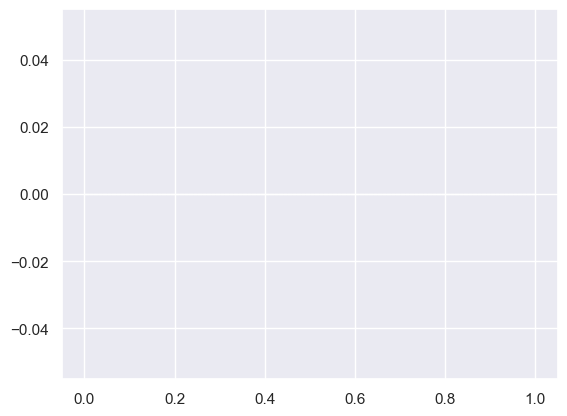

In [257]:
# %%time
# data = BES_reduced_with_na
# corr_mat = BES_reduced_with_na.corr()

corrs = memory_cheap_corrcoef(BES_reduced_with_na.astype('float32'))
corr_mat = pd.DataFrame(corrs,index=BES_reduced_with_na.columns, columns=BES_reduced_with_na.columns)
corr_mat.to_pickle(BES_data_folder+dataset_name+os.sep+"corr_df2.zip",compression='zip')
# .loc[BES_imputed.index[::4]]
# create lower triangle - diag mask
col_vars = len( corr_mat )
df = pd.DataFrame( np.arange(col_vars*col_vars).reshape(col_vars,col_vars) )
mask = np.ones(df.shape,dtype='bool')
mask[np.triu_indices(len(df))] = False
corr_mat.mask(~mask).stack().hist(bins=100)

In [258]:
thresh = .05
x = ( ( corr_mat>(1-thresh) ) & mask ).values.nonzero()

for i in range( 0,len(x[0]) ):
    a = corr_mat.columns[ x[0][i] ]
    b = corr_mat.columns[ x[1][i] ]
    print( ( a,b,corr_mat[a][b], BES_reduced_with_na[a].notnull().mean(), BES_reduced_with_na[b].notnull().mean() ) )

x = ( ( corr_mat<(thresh-1) ) & mask ).values.nonzero()

for i in range( 0,len(x[0]) ):
    a = corr_mat.columns[ x[0][i] ]
    b = corr_mat.columns[ x[1][i] ]
    print( ( a,b,corr_mat[a][b], BES_reduced_with_na[a].notnull().mean(), BES_reduced_with_na[b].notnull().mean() ) )    

In [259]:
# high_corr_drop_list = ['country_Scotland', 'country_Wales', 'polKnowMay_Leader of the Labour Party',
                      # 'polKnowBercow_Home secretary', 'polKnowMiliband_Deputy Prime Minister']

# dummy_cat_high_corr_drop_list = ['country_Scotland', 'country_Wales','BESwave10_Samplesurvey_taken a BES wave',
#                                 'profile_ethnicity_Chinese','profile_ethnicity_Indian','profile_ethnicity_Pakistani',
#                                 'profile_religion_Yes - Islam','housing_Own outright']

dummy_cat_high_corr_drop_list = ['country_Scotland', 'country_Wales']

# dummy_cat_high_corr_drop_list = ['country_Wales', 'profile_ethnicity_Chinese','profile_ethnicity_Indian','profile_ethnicity_Pakistani',
#                                 'profile_religion_Yes - Islam']

BES_reduced.drop( dummy_cat_high_corr_drop_list,axis=1, inplace=True, errors='ignore')
BES_reduced_with_na.drop( dummy_cat_high_corr_drop_list,axis=1, inplace=True, errors='ignore')
print("dummy_cat_high_corr_drop_list", BES_reduced.shape)
print(dummy_cat_high_corr_drop_list)

dummy_cat_high_corr_drop_list (111621, 13180)
['country_Scotland', 'country_Wales']


In [260]:
# %%time
# nans = BES_numeric[[new_old_col_names[col] if col in new_old_col_names.keys() else col for col in BES_reduced.columns ]].isnull()
# nans.to_msgpack( data_subfolder + "nans.msgpack")
# del nans

In [261]:
# very_low_var
# NoiseVariance.loc[very_low_var].sort_values(by='noise_variance_')fc

# upshot - get rid of 

In [262]:
# del BES_imputed, counts_by_individuals, corr_df

In [263]:
# import sys
# for var, obj in locals().items():
#     if ( sys.getsizeof(obj)> 1000000):
#         print(var, sys.getsizeof(obj))

In [264]:
# BES_reduced_with_na_2 = BES_reduced_with_na.apply(pd.to_numeric,downcast='float')
# BES_reduced_with_na_2.dtypes.value_counts()

In [265]:
########################################
########################################
## Pandas is trialling a new NAtype called pd.NA specifically just for missing values
## However, still experimental, so I'm going to replace it

In [266]:
BES_reduced_with_na = BES_reduced_with_na.astype('float').replace(pd.NA,np.nan)

MemoryError: Unable to allocate 11.0 GiB for an array with shape (13180, 111621) and data type float64

In [269]:
gc.collect()

9146

In [270]:
# BES_reduced_with_na.to_pickle( data_subfolder + "BES_reduced_with_na.zip",compression='zip')
BES_reduced.to_pickle( data_subfolder + "BES_reduced.zip",compression='zip')

In [271]:
gc.collect()
BES_reduced_with_na.to_pickle( data_subfolder + "BES_reduced_with_na.zip",compression='zip')

In [ ]:
# BES_reduced_with_na = BES_reduced_with_na.apply(pd.to_numeric,downcast='float')
# BES_reduced_with_na.to_msgpack( data_subfolder + "BES_reduced_with_na2.msgpack")

In [ ]:
# assert (BES_reduced==-1).sum().sum()==0
# BES_reduced = BES_reduced.apply(pd.to_numeric,downcast='integer')
# BES_reduced.to_msgpack( data_subfolder + "BES_reduced.msgpack")

In [ ]:
# assert (BES_reduced_with_na==-1).sum().sum()==0
# # BES_reduced_with_na.fillna(-1,inplace=True)
# BES_reduced_with_na = BES_reduced_with_na.apply(pd.to_numeric,downcast='integer')
# BES_reduced_with_na.to_msgpack( data_subfolder + "BES_reduced_with_na.msgpack")

In [272]:
# save decomp object    
fname = data_subfolder + "new_old_col_names.pkl"

with open(fname, "wb") as f:
    pickle.dump( new_old_col_names, f )

In [ ]:
# (BES_data_folder+"BES_reduced_with_na"+wave+".hdf","BES_reduced_with_na"+wave)


In [ ]:
# del BES_numeric,BES_imputed,BES_reduced,BES_Panel,corr_mat,df,mask

In [ ]:

# assert (BES_numeric==-1).sum().sum()==0
# BES_numeric.fillna(-1,inplace=True)
# BES_numeric = BES_numeric.apply(pd.to_numeric,downcast='integer')
# BES_numeric.to_msgpack( data_subfolder + "BESnumeric.msgpack")

In [ ]:
# BES_reduced_with_na.stack().value_counts()

In [ ]:
var_type.loc['age']

In [ ]:
gc.collect()

In [ ]:
# np.linalg.matrix_rank( BES_reduced.drop(dummy_cat_high_corr_drop_list, axis=1, errors="ignore").values )

In [ ]:
# BES_reduced.drop(dummy_cat_high_corr_drop_list,axis=1,errors="ignore").shape

In [ ]:
# qr = np.linalg.qr(BES_reduced.drop(dummy_cat_high_corr_drop_list,axis=1,errors="ignore").values)[1]

In [ ]:
# qr.shape

In [ ]:
# BES_reduced.drop(dummy_cat_high_corr_drop_list,axis=1,errors="ignore").columns[np.abs(np.sum(qr,axis=1))<.3 ]

In [ ]:
# dummy_cat_high_corr_drop_list.append('xprofile_ethnicity_Pakistani')

In [ ]:
# dummy_cat_high_corr_drop_list

In [ ]:
# dummy_cat_high_corr_drop_list = ['country_Scotland', 'country_Wales','BESwave10_Samplesurvey_taken a BES wave',
#                                 'profile_ethnicity_Chinese','profile_ethnicity_Indian','profile_ethnicity_Pakistani',
#                                 'profile_religion_Yes - Islam','housing_Own outright']

In [ ]:
# [x for x in BES_Panel.columns if 'age' in x.lower()]

In [ ]:
# BES_Panel.shape[0]*.02

In [ ]:
# BES_numeric["likeWoodW1"].notnull().sum()

In [ ]:
# mostly_not_filled_out

In [ ]:
# # a list of dropped variables!
# l = [many_cat_drop_list,
# high_corr_drop_list,
# mostly_not_filled_out,
# very_low_var]

# flat_list = [item for sublist in l for item in sublist]

# fname = data_subfolder + "red_dropped_var"
# with open(fname+".pkl", "wb") as f: pickle.dump( flat_list, f )

In [ ]:

BES_reduced_with_na = BES_reduced_with_na.apply(pd.to_numeric,downcast='float')


In [ ]:
BES_reduced_with_na.dtypes.value_counts()

In [273]:
memory_use(locs = locals().items())

                   BES_numeric:   8.3GiB
           BES_reduced_with_na:   5.3GiB
                     BES_Panel:   1.5GiB
                   BES_reduced:   1.4GiB
                      corr_mat:   1.3GiB
                         corrs:   1.3GiB
                   BES_imputed:   1.1GiB
                            df: 662.7MiB
                          mask: 165.7MiB
                      var_type:   8.8MiB


In [ ]:
# BES_reduced_with_na.to_msgpack( data_subfolder + "BES_reduced_with_na.msgpack")

In [274]:
del corr_mat, df

